In [1]:
from tensorflow.keras.datasets import mnist
((X_train,y_train),(X_test,y_test)) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


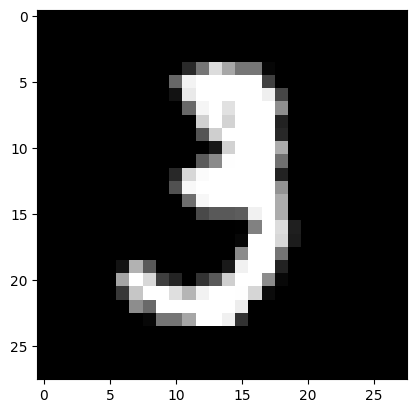

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10],cmap = 'gray')
plt.show()

In [ ]:
# 손글씨 데이터셋
# 0 ~ 9까지의 손글씨 6만장 / 한 이미지는 28*28
X_train.shape

(60000, 28, 28)

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 1. 다중분류 실습
# 2. 활성화 함수가 변하면 모델의 결과가 달라지는지 확인해보기
# 3. 층의 깊이에 따라 모델의 결과가 달라지는지 확인해보기

In [7]:
# 데이터 전처리
# Dense에 학습 시키기위해 형태 변경 2차원(28X28) > 1차원(784)
X_train = X_train.reshape((60000,784))
X_test = X_test.reshape((10000,784))
# 이미지 픽셀값 수정 0 ~ 255(정수) > 0 ~ 1(실수)
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255
## 값의 범위(분산)을 줄여서 계산상의 오차를 줄이자
## 작은 범위로도 기존의 의미를 표현

In [8]:
# 다중분류
# 정답컬럼을 원핫인코딩
# 예측 결과를 정답의 종류마다 확률로 출력
# train 정답도 정답의 종류마다 확률로 만들어야함
# train은 정답이 존재하기 때문에 정답일 확률이 100%다
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [9]:
# False = 0, True = 1
y_train

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
59995,False,False,False,False,False,False,False,False,True,False
59996,False,False,False,True,False,False,False,False,False,False
59997,False,False,False,False,False,True,False,False,False,False
59998,False,False,False,False,False,False,True,False,False,False


In [10]:
# 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 입력층과 중간층의 activation = sigmoid
# sigmoid : 값의 전달을 최대 25%만 하니까 전달이 제대로 안된다 > 학습이 제대로 안된다
# > 기울기 소실(Vanishing Gradient)이 발생
model1 = Sequential()
# 입력층
model1.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
# 중간층
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 32, activation = 'sigmoid'))
model1.add(Dense(units = 16, activation = 'sigmoid'))
# 출력층
model1.add(Dense(units = 10, activation = 'softmax'))

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

h1 = model1.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3935 - loss: 1.7327 - val_accuracy: 0.8838 - val_loss: 0.5508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9002 - loss: 0.4531 - val_accuracy: 0.9272 - val_loss: 0.3055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9307 - loss: 0.2786 - val_accuracy: 0.9371 - val_loss: 0.2567
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9443 - loss: 0.2227 - val_accuracy: 0.9436 - val_loss: 0.2231
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9506 - loss: 0.1872 - val_accuracy: 0.9456 - val_loss: 0.2087
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9557 - loss: 0.1735 - val_accuracy: 0.9520 - val_loss: 0.1930
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9601 - loss: 0.1489 - val_accuracy: 0.9491 - val_loss: 0.1894
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9631 - loss: 0.1

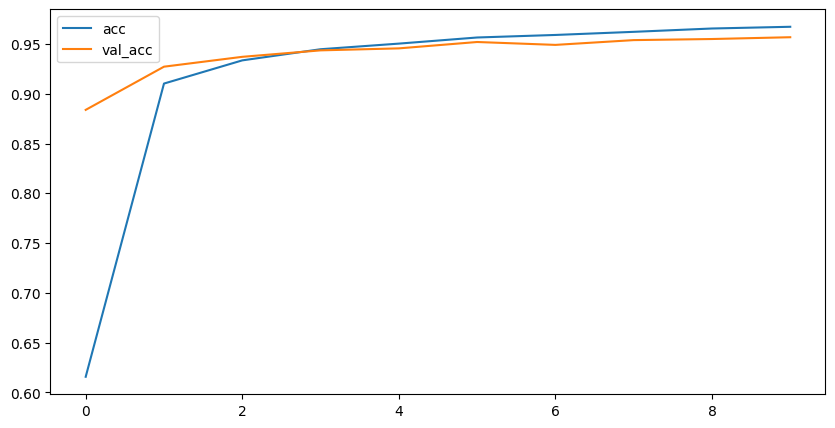

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(h1.history['accuracy'], label = 'acc')
plt.plot(h1.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/수업/24.08.2강의장/data/num.gif'
import PIL.Image as pimg
img = pimg.open(img_path)
import numpy as np
num = np.array(img)
# 배경색과 글씨색 바꾸기
## 배경을 검은색(0)으로 글씨를 흰색(255)으로
## 255 > 0
## 254 > 1
## 253 > 2
## 252 > 3
## 2 > 253
## 1 > 254
## 0 > 255
num = 255 - num
# 예측 데이터는 학습 데이터와 동일한 형식으로 만들어줘야함
# 동일한 전처리를 진행해야한다.
# 2차원 > 1차원으로 만들기
num = num.reshape(1,784)
# 픽셀값 수정
num = num.astype('float') / 255
# 예측하기
# 값이 10개가 출력
# 7.4723357e-06 = 7.4723357 * e-06 = 7.4723357 * 0.000001 = 0.0000074723357
# e-06 = 10^(-6) = 0.000001
# e-1 = 10^(-1) = 0.1
# 9.0364802e-01 = 0.90364802 > 90.36%
# 2를 그렸는데 1이라 예측 > 틀렸다.
model1.predict(num)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


array([[8.8653498e-04, 1.0840518e-03, 9.8107696e-01, 2.9966389e-03,
        2.7457234e-03, 7.1376521e-06, 1.1345926e-04, 1.4243479e-03,
        2.0240424e-03, 7.6412647e-03]], dtype=float32)

In [ ]:
# 모델 평가 결과 = 0.95 > 95%
# 실제 확인 결과 = 2/13 > 15%

# 문제데이터의 형식이 고정되어있다
# 손글씨 분류 모델
# 글자가 가운데에 위치하고 손글씨가 적당한 크기일때 잘 판단하는 모델

# 데이터를 모을때 고려 사항
## 사용자가 사용할거같은 데이터로 학습을 시키자 > 사용자의 데이터를 잘 예측

In [ ]:
# 1. 활성화함수 tanh
# 2. 활성화함수 relu
# 3. 층의 갯수는 그대로 두고 units 늘리기
# 4. 중간층 더 많이 쌓기

In [11]:
# 활성화함수
def make_deep(act):
  model1 = Sequential()
  # 입력층
  model1.add(Dense(units = 32, input_dim = 784, activation = act))
  # 중간층
  model1.add(Dense(units = 64, activation = act))
  model1.add(Dense(units = 32, activation = act))
  model1.add(Dense(units = 16, activation = act))
  # 출력층
  model1.add(Dense(units = 10, activation = 'softmax'))

  model1.compile(
      loss = 'categorical_crossentropy',
      optimizer = 'adam',
      metrics = ['accuracy']
  )

  h1 = model1.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))
  return h1

In [12]:
deep_sigmoid = make_deep('sigmoid')
deep_tanh = make_deep('tanh')
deep_relu = make_deep('relu')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4449 - loss: 1.6707 - val_accuracy: 0.8623 - val_loss: 0.5595
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8890 - loss: 0.4738 - val_accuracy: 0.9250 - val_loss: 0.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9297 - loss: 0.2846 - val_accuracy: 0.9370 - val_loss: 0.2438
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9452 - loss: 0.2168 - val_accuracy: 0.9437 - val_loss: 0.2144
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9527 - loss: 0.1815 - val_accuracy: 0.9458 - val_loss: 0.1979
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9589 - loss: 0.1550 - val_accuracy: 0.9487 - val_loss: 0.1869
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 - loss: 0.1452 - val_accuracy: 0.9521 - val_loss: 0.1795
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9655 - loss: 0.1310 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8387 - loss: 0.6351 - val_accuracy: 0.9430 - val_loss: 0.1980
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9495 - loss: 0.1736 - val_accuracy: 0.9591 - val_loss: 0.1432
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1266 - val_accuracy: 0.9562 - val_loss: 0.1429
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9695 - loss: 0.1037 - val_accuracy: 0.9616 - val_loss: 0.1256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9735 - loss: 0.0904 - val_accuracy: 0.9611 - val_loss: 0.1342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9753 - loss: 0.0820 - val_accuracy: 0.9698 - val_loss: 0.1029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9795 - loss: 0.0669 - val_accuracy: 0.9712 - val_loss: 0.1036
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9814 - loss: 0.0603 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7908 - loss: 0.6546 - val_accuracy: 0.9514 - val_loss: 0.1700
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9503 - loss: 0.1680 - val_accuracy: 0.9586 - val_loss: 0.1373
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9615 - loss: 0.1237 - val_accuracy: 0.9603 - val_loss: 0.1279
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9690 - loss: 0.1009 - val_accuracy: 0.9670 - val_loss: 0.1144
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9727 - loss: 0.0876 - val_accuracy: 0.9696 - val_loss: 0.1009
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0782 - val_accuracy: 0.9665 - val_loss: 0.1120
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9780 - loss: 0.0701 - val_accuracy: 0.9695 - val_loss: 0.0982
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9795 - loss: 0.0622 - 

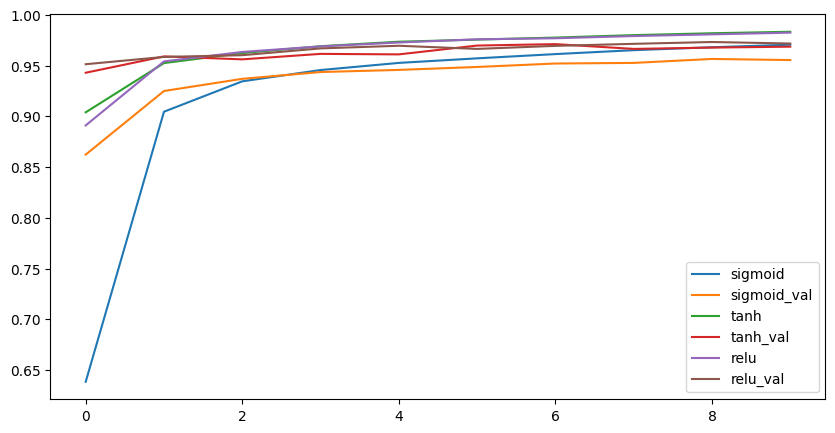

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # 그래프 크기 조절
plt.plot(deep_sigmoid.history['accuracy'], label = 'sigmoid')
plt.plot(deep_sigmoid.history['val_accuracy'], label = 'sigmoid_val')
plt.plot(deep_tanh.history['accuracy'], label = 'tanh')
plt.plot(deep_tanh.history['val_accuracy'], label = 'tanh_val')
plt.plot(deep_relu.history['accuracy'], label = 'relu')
plt.plot(deep_relu.history['val_accuracy'], label = 'relu_val')
plt.legend()
plt.show()
# sigmoid : 기울기 소실이 많이 발생, 초기단계의 학습이 잘 안됨
# tanh : 기울기 소실이 조금 발생, 층이 깊지 않아서 크게 도드라지지 않음
# relu : 보통 결과가 좋은편, sigmoid와 tanh와 비교했을때

In [15]:
# activation : sigmoid
# 학습이 안되어야 차이가 잘보여서

model2 = Sequential()
# 입력층
model2.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
# 중간층
model2.add(Dense(units = 128, activation = 'sigmoid'))
model2.add(Dense(units = 64, activation = 'sigmoid'))
model2.add(Dense(units = 32, activation = 'sigmoid'))
# 출력층
model2.add(Dense(units = 10, activation = 'softmax'))

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

h2 = model2.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5274 - loss: 1.4315 - val_accuracy: 0.8951 - val_loss: 0.4133
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9077 - loss: 0.3514 - val_accuracy: 0.9268 - val_loss: 0.2669
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9345 - loss: 0.2407 - val_accuracy: 0.9420 - val_loss: 0.2082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9492 - loss: 0.1824 - val_accuracy: 0.9457 - val_loss: 0.1979
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9540 - loss: 0.1628 - val_accuracy: 0.9487 - val_loss: 0.1798
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9602 - loss: 0.1394 - val_accuracy: 0.9534 - val_loss: 0.1632
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9646 - loss: 0.1223 - val_accuracy: 0.9544 - val_loss: 0.1613
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9687 - loss: 0.1102 -

In [16]:
# activation : sigmoid
# 학습이 안되어야 차이가 잘보여서

model3 = Sequential()
# 입력층
model3.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
# 중간층
model3.add(Dense(units = 64, activation = 'sigmoid'))
model3.add(Dense(units = 64, activation = 'sigmoid'))
model3.add(Dense(units = 32, activation = 'sigmoid'))
model3.add(Dense(units = 32, activation = 'sigmoid'))
model3.add(Dense(units = 16, activation = 'sigmoid'))
model3.add(Dense(units = 16, activation = 'sigmoid'))
# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

h3 = model3.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1796 - loss: 2.0803 - val_accuracy: 0.4004 - val_loss: 1.3923
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4589 - loss: 1.3148 - val_accuracy: 0.5907 - val_loss: 1.0599
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5997 - loss: 1.0172 - val_accuracy: 0.6309 - val_loss: 0.9017
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6574 - loss: 0.8687 - val_accuracy: 0.7308 - val_loss: 0.7476
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7399 - loss: 0.6998 - val_accuracy: 0.8906 - val_loss: 0.4658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9011 - loss: 0.4150 - val_accuracy: 0.9093 - val_loss: 0.3747
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9174 - loss: 0.3390 - val_accuracy: 0.9123 - val_loss: 0.3423
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9232 - loss: 0.301

In [17]:
# 입력층과 중간층의 activation = sigmoid
# sigmoid : 값의 전달을 최대 25%만 하니까 전달이 제대로 안된다 > 학습이 제대로 안된다
# > 기울기 소실(Vanishing Gradient)이 발생
model1 = Sequential()
# 입력층
model1.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
# 중간층
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 32, activation = 'sigmoid'))
model1.add(Dense(units = 16, activation = 'sigmoid'))
# 출력층
model1.add(Dense(units = 10, activation = 'softmax'))

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

h1 = model1.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5015 - loss: 1.6228 - val_accuracy: 0.8424 - val_loss: 0.5658
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8803 - loss: 0.4800 - val_accuracy: 0.9218 - val_loss: 0.3130
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.2850 - val_accuracy: 0.9363 - val_loss: 0.2422
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9433 - loss: 0.2216 - val_accuracy: 0.9456 - val_loss: 0.2064
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9537 - loss: 0.1823 - val_accuracy: 0.9511 - val_loss: 0.1865
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9586 - loss: 0.1608 - val_accuracy: 0.9519 - val_loss: 0.1773
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1409 - val_accuracy: 0.9551 - val_loss: 0.1643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9670 - loss: 0.1283 -

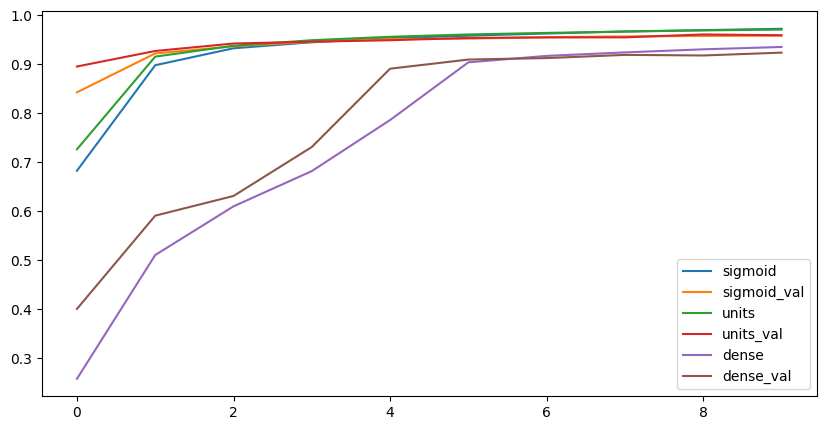

In [18]:
# sigmoid : model1 = 가장 기본 모델
# units : model2 = 기본모델에서 units 늘린것
# dense : model3 = 기본모델에서 중간층 늘린것

# model2, model3가 model1보다 결과가 좋은게 일반적

# sigmoid를 사용하고있어서 dense를 늘리면 기울기소실이 심해져서 학습이 안될수도

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # 그래프 크기 조절
plt.plot(h1.history['accuracy'], label = 'sigmoid')
plt.plot(h1.history['val_accuracy'], label = 'sigmoid_val')
plt.plot(h2.history['accuracy'], label = 'units')
plt.plot(h2.history['val_accuracy'], label = 'units_val')
plt.plot(h3.history['accuracy'], label = 'dense')
plt.plot(h3.history['val_accuracy'], label = 'dense_val')
plt.legend()
plt.show()
# sigmoid 활성화함수를 사용할때는 층을 늘리는것 보다는 units을 늘리는게 도움이 된다

# 만약 sigmoid가 아니라 relu 였다면, 층늘리기, units늘리기도 도움 될거같다

In [ ]:
# Optimizer : 최적화함수, 경사하강법
# 종류에 따라 결과가 달라진다

# 보통 Adam이 결과가 좋은 편
# SGD, RMSProp, Ndam, Momentum, Ad~~

In [19]:
# 활성화함수
def make_deep(opt):
  model1 = Sequential()
  # 입력층
  model1.add(Dense(units = 32, input_dim = 784, activation = 'sigmoid'))
  # 중간층
  model1.add(Dense(units = 64, activation = 'sigmoid'))
  model1.add(Dense(units = 32, activation = 'sigmoid'))
  model1.add(Dense(units = 16, activation = 'sigmoid'))
  # 출력층
  model1.add(Dense(units = 10, activation = 'softmax'))

  model1.compile(
      loss = 'categorical_crossentropy',
      optimizer = opt,
      metrics = ['accuracy']
  )

  h1 = model1.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))
  return h1

In [20]:
sgd = make_deep('SGD')
rms = make_deep('RMSProp')
adam = make_deep('adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1045 - loss: 2.3215 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1112 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3007
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1129 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1141 - loss: 2.3006 - val_accuracy: 0.1135 - val_loss: 2.3002
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1116 - loss: 2.3004 - val_accuracy: 0.1135 - val_loss: 2.2996
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1118 - loss: 2.3001 - val_accuracy: 0.1135 - val_loss: 2.2994
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1110 - loss: 2.2997 - val_accuracy: 0.1135 - val_loss: 2.2985
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1125 - loss: 2.2989 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3283 - loss: 1.8818 - val_accuracy: 0.7987 - val_loss: 0.7848
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8326 - loss: 0.6554 - val_accuracy: 0.9029 - val_loss: 0.4145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.3853 - val_accuracy: 0.9214 - val_loss: 0.3138
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9206 - loss: 0.3078 - val_accuracy: 0.9271 - val_loss: 0.2899
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9318 - loss: 0.2652 - val_accuracy: 0.9350 - val_loss: 0.2560
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9368 - loss: 0.2414 - val_accuracy: 0.9381 - val_loss: 0.2493
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9417 - loss: 0.2214 - val_accuracy: 0.9431 - val_loss: 0.2300
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9458 - loss: 0.2032 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4180 - loss: 1.7291 - val_accuracy: 0.7419 - val_loss: 0.6881
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7798 - loss: 0.6083 - val_accuracy: 0.8861 - val_loss: 0.4418
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9007 - loss: 0.3874 - val_accuracy: 0.9219 - val_loss: 0.3036
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9355 - loss: 0.2531 - val_accuracy: 0.9310 - val_loss: 0.2591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9476 - loss: 0.2036 - val_accuracy: 0.9471 - val_loss: 0.2090
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1748 - val_accuracy: 0.9484 - val_loss: 0.1997
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9610 - loss: 0.1516 - val_accuracy: 0.9513 - val_loss: 0.1873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9647 - loss: 0.1341 -

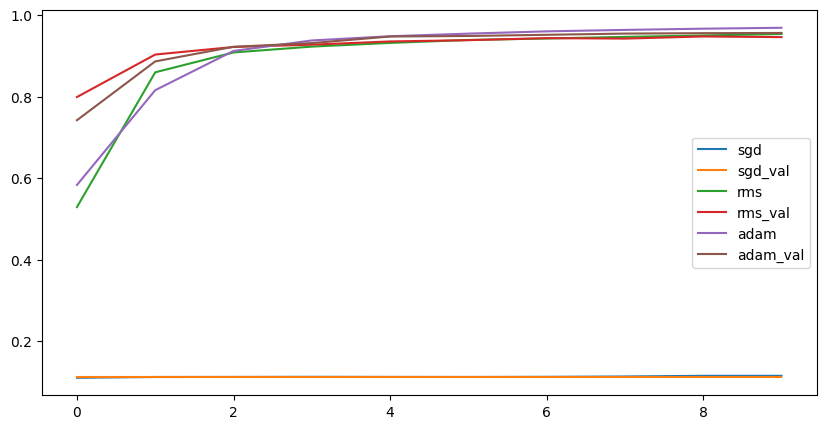

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # 그래프 크기 조절
plt.plot(sgd.history['accuracy'], label = 'sgd')
plt.plot(sgd.history['val_accuracy'], label = 'sgd_val')
plt.plot(rms.history['accuracy'], label = 'rms')
plt.plot(rms.history['val_accuracy'], label = 'rms_val')
plt.plot(adam.history['accuracy'], label = 'adam')
plt.plot(adam.history['val_accuracy'], label = 'adam_val')
plt.legend()
plt.show()